Viewing data

# Download the dataset


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [1]:
# https://drive.google.com/file/d/1CJyTqtCM4kOSQt2X7n2NgWCVEqou8RCB/view?usp=sharing
from google.colab import files
!gdown --id 1CJyTqtCM4kOSQt2X7n2NgWCVEqou8RCB


/bin/sh: 1: gdown: not found


# Print the classes in the dataset

In [14]:
filename = "moving_target_dataset.npy"
signatures = np.load(filename, allow_pickle=True)

class_names = []
for signature in signatures:
    if not any(signature['class_name'] in s for s in class_names):
        class_names.append(signature['class_name'])

print(class_names)

['vehicle', 'person', 'bicycle', 'uav']


# View the dataset
Shows some samples of the dataset

In [10]:
##%

is_shown = {}
for class_name in class_names:
    is_shown[class_name] = False

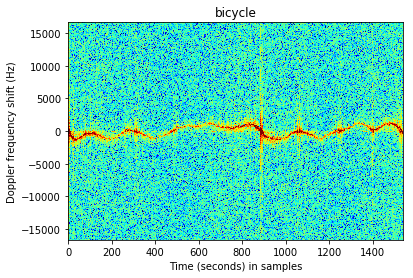

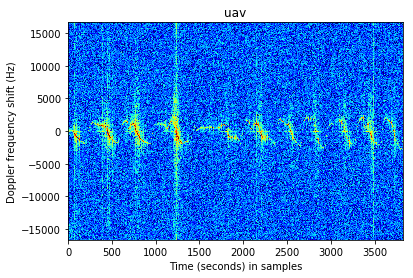

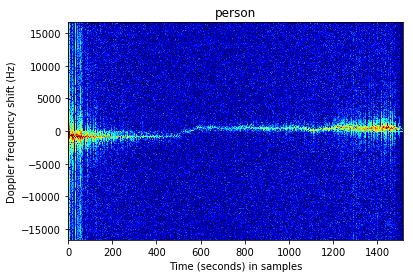

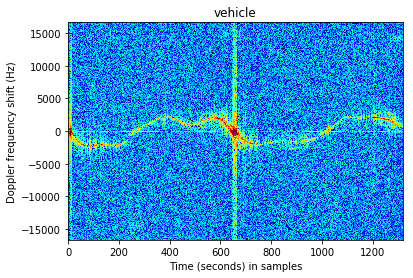

In [11]:
for signature in signatures:
    if (len(signature['snr_db']) > 500) or (signature['class_name']=="uav" and len(signature['snr_db']) > 100):
        if(not is_shown[signature['class_name']]):
            is_shown[signature['class_name']] = True
            arr = signature['signature']
            arr = 20 * np.log10(np.abs(arr)).transpose()
            prf = signature['radar_parameters']['prf']
            plt.imshow(arr, cmap='jet', aspect='auto', vmax=np.max(arr) - 20, vmin=np.max(arr) - 70,
                          extent=[0, arr.shape[1], -int(prf/2), int(prf / 2)])
            plt.title(signature['class_name'])
            plt.autoscale()
            # plt.colorbar(axdata)
            plt.xlabel('Time (seconds) in samples')
            plt.ylabel('Doppler frequency shift (Hz)')
            plt.show()

The files in the dataset are of long tracks of each subject, to use them for machine learning tests,
it is important that we split the the data on the track-basis an not only spectra.
We therefore perform the spliting at this point.

In [16]:


from sklearn.model_selection import train_test_split
from sklearn import preprocessing

all_indices = list(range(len(signatures)))
train_indices, test_indices = train_test_split(all_indices, test_size=0.2, random_state=42)

le = preprocessing.LabelEncoder()
le.fit_transform(class_names)

# for ind in train_indices:
train_signatures = [signatures[i] for i in train_indices]
test_signatures = [signatures[i] for i in test_indices]

#Count the Number of samples:
n_samples_train = 0
n_samples_test = 0
for signature in train_signatures:
    n_samples_train += len(signature['ts'])

for signature in test_signatures:
    n_samples_test += len(signature['ts'])


print("Train dataset size: " +str(n_samples_train))
print("Test dataset size: " +str(n_samples_test))


Train dataset size: 151455
Test dataset size: 35937


These two datasets now contain everything you need to do classification research.
You simply have to slice the spectrograms into convenient sizes and start the challenge.
Each spectra contains 1008 Doppler bins and concatinating 10 spectra corresponds to half a second observation time.
